Importing Libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

Reading CSV

In [2]:
data=pd.read_csv("Dataset_2.csv")
data['Label'].value_counts()

Label
0    63561
1    40784
Name: count, dtype: int64

Dataset info

In [3]:
dataset_info = data.info()
dataset_head = data.head()

dataset_info, dataset_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Timestamp                    104345 non-null  int64  
 1   switch                       104345 non-null  int64  
 2   Source_IP                    104345 non-null  object 
 3   Dst_IP                       104345 non-null  object 
 4   Packet_Count                 104345 non-null  int64  
 5   Byte_Size                    104345 non-null  int64  
 6   Duration                     104345 non-null  int64  
 7   Duration_nsec                104345 non-null  int64  
 8   Total_Duration               104345 non-null  float64
 9   No._flows                    104345 non-null  int64  
 10  No._of_packets               104345 non-null  int64  
 11  Avg_Pakets                   104345 non-null  int64  
 12  Bytes_per_flow               104345 non-null  int64  
 13 

(None,
    Timestamp  switch Source_IP    Dst_IP  Packet_Count  Byte_Size  Duration  \
 0      11425       1  10.0.0.1  10.0.0.8         45304   48294064       100   
 1      11605       1  10.0.0.1  10.0.0.8        126395  134737070       280   
 2      11425       1  10.0.0.2  10.0.0.8         90333   96294978       200   
 3      11425       1  10.0.0.2  10.0.0.8         90333   96294978       200   
 4      11425       1  10.0.0.2  10.0.0.8         90333   96294978       200   
 
    Duration_nsec  Total_Duration  No._flows  ...  Rate_of_packet_transmitting  \
 0      716000000    1.010000e+11          3  ...                          451   
 1      734000000    2.810000e+11          2  ...                          451   
 2      744000000    2.010000e+11          3  ...                          451   
 3      744000000    2.010000e+11          3  ...                          451   
 4      744000000    2.010000e+11          3  ...                          451   
 
    Pair_flow  Pr

Splitting into X and Y labels

In [5]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Label'],axis=1)
y = data['Label']

Train-Test-Split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (83476, 22)
Shape of X Test:  (20869, 22)
Shape of y Train:  (83476,)
Shape of y Test:  (20869,)


Filling missing info

In [7]:
# Impute missing values with mean
data['Received_rate-kb'].fillna(data['Received_rate-kb'].mean(), inplace=True)
data['Total-data_rate'].fillna(data['Total-data_rate'].mean(), inplace=True)

C:\Users\Priyamvatha K\AppData\Local\Temp\ipykernel_20108\694684806.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Received_rate-kb'].fillna(data['Received_rate-kb'].mean(), inplace=True)
C:\Users\Priyamvatha K\AppData\Local\Temp\ipykernel_20108\694684806.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each of the specified columns
categorical_columns = ['Source_IP', 'Dst_IP', 'Protocol']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Verify the encoding
print(data[categorical_columns].head())

   Source_IP  Dst_IP  Protocol
0          0      16         2
1          0      16         2
2         10      16         2
3         10      16         2
4         10      16         2


Applying Standardization and Normalization 

In [11]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to standardize
numerical_columns = ['Packet_Count', 'Byte_Size', 'Duration', 'Total_Duration', 'No._flows', 
                     'No._of_packets', 'Avg_Pakets', 'Bytes_per_flow', 'Rate_of_packet_transmitting', 
                     'Transmitted_rate-kb', 'Received_rate-kb', 'Total-data_rate']

# Initialize the scaler
scaler = StandardScaler()

# Apply standardization
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Verify the changes
print(data[numerical_columns].head())

   Packet_Count  Byte_Size  Duration  Total_Duration  No._flows  \
0     -0.145262   0.207217 -0.781249       -0.779412  -0.899733   
1      1.413491   1.979416 -0.146367       -0.144270  -1.238714   
2      0.720298   1.191301 -0.428537       -0.426555  -0.899733   
3      0.720298   1.191301 -0.428537       -0.426555  -0.899733   
4      0.720298   1.191301 -0.428537       -0.426555  -0.899733   

   No._of_packets  Avg_Pakets  Bytes_per_flow  Rate_of_packet_transmitting  \
0       -0.619631    0.966041        1.284664                      0.96733   
1       -0.619631    0.965501        1.284100                      0.96733   
2       -0.619631    0.965906        1.284523                      0.96733   
3       -0.619631    0.965906        1.284523                      0.96733   
4       -0.619631    0.965906        1.284523                      0.96733   

   Transmitted_rate-kb  Received_rate-kb  Total-data_rate  
0            -0.412179         -0.489691        -0.640011  
1       

Feature Engineering

In [12]:
# Create new features by combining related features
data['Transmitted_to_Received_Ratio'] = (
    data['No._Transmitted-bytes'] / (data['No._recieved-bytes'] + 1e-9)
)  # Add small value to avoid division by zero

# Interaction term: Multiply related features
data['Byte_Size_x_Duration'] = data['Byte_Size'] * data['Duration']

# Interaction term: Add or subtract related features
data['Total_Bytes'] = data['No._Transmitted-bytes'] + data['No._recieved-bytes']
data['Byte_Difference'] = data['No._Transmitted-bytes'] - data['No._recieved-bytes']

# Verify the new features
print(data[['Transmitted_to_Received_Ratio', 'Byte_Size_x_Duration', 
               'Total_Bytes', 'Byte_Difference']].head())


   Transmitted_to_Received_Ratio  Byte_Size_x_Duration  Total_Bytes  \
0                   36744.608374             -0.161888    143932548   
1                       1.091477             -0.289720         7362   
2                       3.055556             -0.510516         5037   
3                       2.471850             -0.510516         5180   
4                       0.931241             -0.510516         7078   

   Byte_Difference  
0        143924714  
1              322  
2             2553  
3             2196  
4             -252  


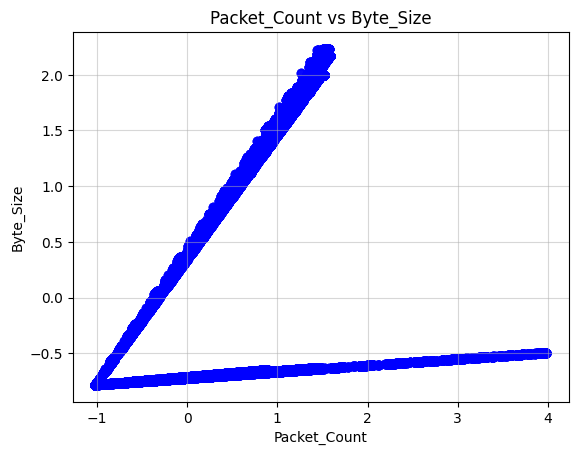

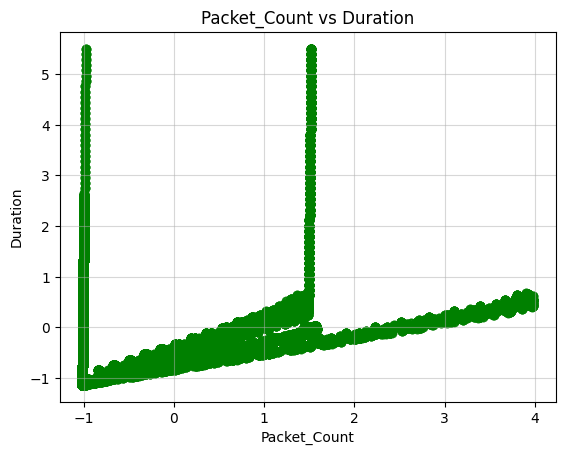

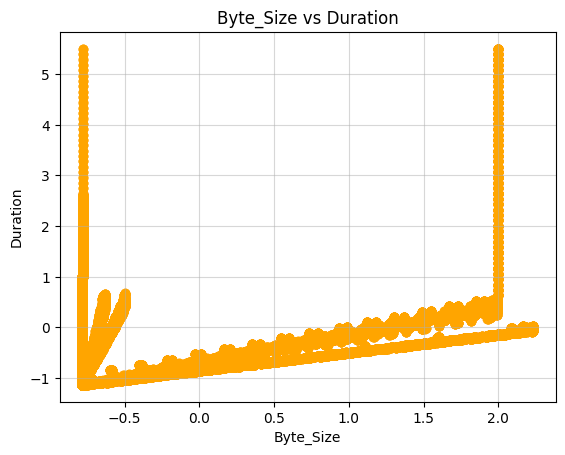

In [29]:
import matplotlib.pyplot as plt

# Scatter plot: Packet_Count vs Byte_Size
plt.scatter(data['Packet_Count'], data['Byte_Size'], alpha=0.5, color='blue')
plt.title("Packet_Count vs Byte_Size")
plt.xlabel("Packet_Count")
plt.ylabel("Byte_Size")
plt.grid(alpha=0.5)
plt.show()

# Scatter plot: Packet_Count vs Duration
plt.scatter(data['Packet_Count'], data['Duration'], alpha=0.5, color='green')
plt.title("Packet_Count vs Duration")
plt.xlabel("Packet_Count")
plt.ylabel("Duration")
plt.grid(alpha=0.5)
plt.show()

# Scatter plot: Byte_Size vs Duration
plt.scatter(data['Byte_Size'], data['Duration'], alpha=0.5, color='orange')
plt.title("Byte_Size vs Duration")
plt.xlabel("Byte_Size")
plt.ylabel("Duration")
plt.grid(alpha=0.5)
plt.show()


Outlier Detection

In [14]:
import numpy as np

# Define a function to remove outliers using Z-Score
def remove_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    return data[(z_scores < threshold).all(axis=1)]

# Apply Z-Score method to numerical columns
numerical_columns = ['Packet_Count', 'Byte_Size', 'Duration', 'Total_Duration', 
                     'No._flows', 'No._of_packets', 'Avg_Pakets', 'Bytes_per_flow', 
                     'Rate_of_packet_transmitting', 'Transmitted_rate-kb', 
                     'Received_rate-kb', 'Total-data_rate']

dataset_no_outliers = remove_outliers_zscore(data[numerical_columns])

# Verify the changes
print(f"Original dataset shape: {data.shape}")
print(f"Dataset after removing outliers (Z-Score): {dataset_no_outliers.shape}")


Original dataset shape: (104345, 27)
Dataset after removing outliers (Z-Score): (93328, 12)


c:\Users\Priyamvatha K\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Class distribution before SMOTE

Class Distribution:
Label
0    63561
1    40784
Name: count, dtype: int64


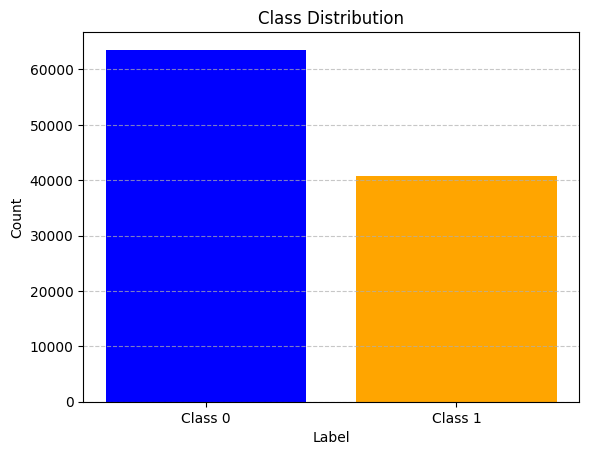

In [25]:
import matplotlib.pyplot as plt

# Check the distribution of the Label column
class_counts = data['Label'].value_counts()
print("Class Distribution:")
print(class_counts)

# Plot the class distribution as a bar chart
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])
plt.title("Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(ticks=class_counts.index, labels=[f"Class {label}" for label in class_counts.index])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Class distribution after SMOTE

Class Distribution After SMOTE:
Label
1    50849
0    50849
Name: count, dtype: int64


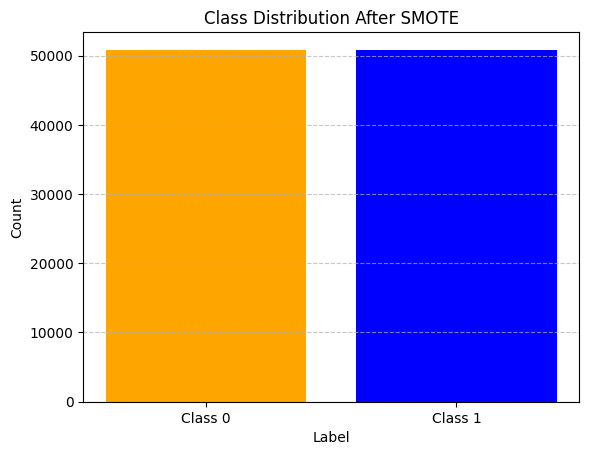

In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Separate features and target
X = data.drop('Label', axis=1)  # All features except Label
y = data['Label']  # Target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training set
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution of the resampled target
print("Class Distribution After SMOTE:")
print(y_train_smote.value_counts())

# Plot the class distribution after SMOTE
class_counts = y_train_smote.value_counts()
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])
plt.title("Class Distribution After SMOTE")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(ticks=class_counts.index, labels=[f"Class {label}" for label in class_counts.index])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Box plots for outlier detection

In [40]:
# Import necessary libraries
import pandas as pd
from tabulate import tabulate

# Re-create the outlier detection logic
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                     # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR      # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR      # Upper bound for outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Load the dataset
file_path = 'Dataset_2.csv'  # Replace with the actual dataset file path
dataset = pd.read_csv(file_path)

# List of numerical columns to check for outliers
numerical_columns = ['Packet_Count', 'Byte_Size', 'Duration', 'Total_Duration', 
                     'No._flows', 'No._of_packets', 'Avg_Pakets', 'Bytes_per_flow', 
                     'Rate_of_packet_transmitting', 'Transmitted_rate-kb', 
                     'Received_rate-kb', 'Total-data_rate']

# Check for outliers in all numerical columns
outlier_summary = {}
for column in numerical_columns:
    outlier_count, lower, upper = detect_outliers_iqr(dataset, column)
    outlier_summary[column] = {
        "Outlier Count": outlier_count,
        "Lower Bound": lower,
        "Upper Bound": upper
    }

# Convert the results into a DataFrame for easy visualization
outlier_summary_df = pd.DataFrame(outlier_summary).T

# Display the results using tabulate
print("Outlier Analysis Results:")
print(tabulate(outlier_summary_df, headers='keys', tablefmt='pretty'))


Outlier Analysis Results:
+-----------------------------+---------------+-----------------+----------------+
|                             | Outlier Count |   Lower Bound   |  Upper Bound   |
+-----------------------------+---------------+-----------------+----------------+
|        Packet_Count         |     633.0     |    -140174.0    |    235778.0    |
|          Byte_Size          |      0.0      |  -114106376.0   |  190389496.0   |
|          Duration           |    7704.0     |     -300.5      |     839.5      |
|       Total_Duration        |    7548.0     | -302000000000.0 | 842000000000.0 |
|          No._flows          |    1045.0     |      -3.0       |      13.0      |
|       No._of_packets        |    7508.0     |     -6335.5     |    15740.5     |
|         Avg_Pakets          |     188.0     |    -14953.0     |    24999.0     |
|       Bytes_per_flow        |     140.0     |   -14585063.0   |   24316017.0   |
| Rate_of_packet_transmitting |     188.0     |     -499.5   

In [37]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


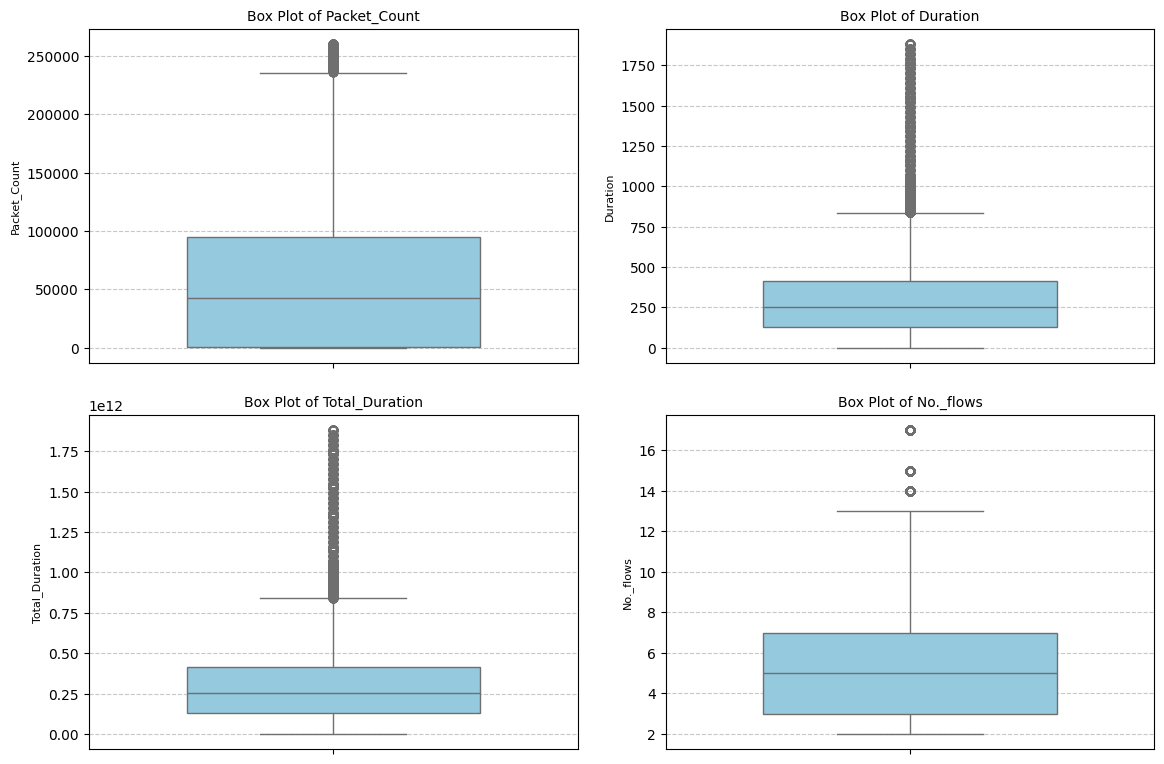

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns with potential outliers
numerical_columns_with_outliers = ['Packet_Count', 'Duration', 'Total_Duration', 'No._flows']

# Create box plots for each column
plt.figure(figsize=(12, 8))  # Adjust figure size for better visibility
for i, column in enumerate(numerical_columns_with_outliers, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    sns.boxplot(y=dataset[column], color='skyblue', width=0.6)
    plt.title(f"Box Plot of {column}", fontsize=10)
    plt.ylabel(column, fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(pad=2)  # Adjust layout
plt.show()


Correlation matrix

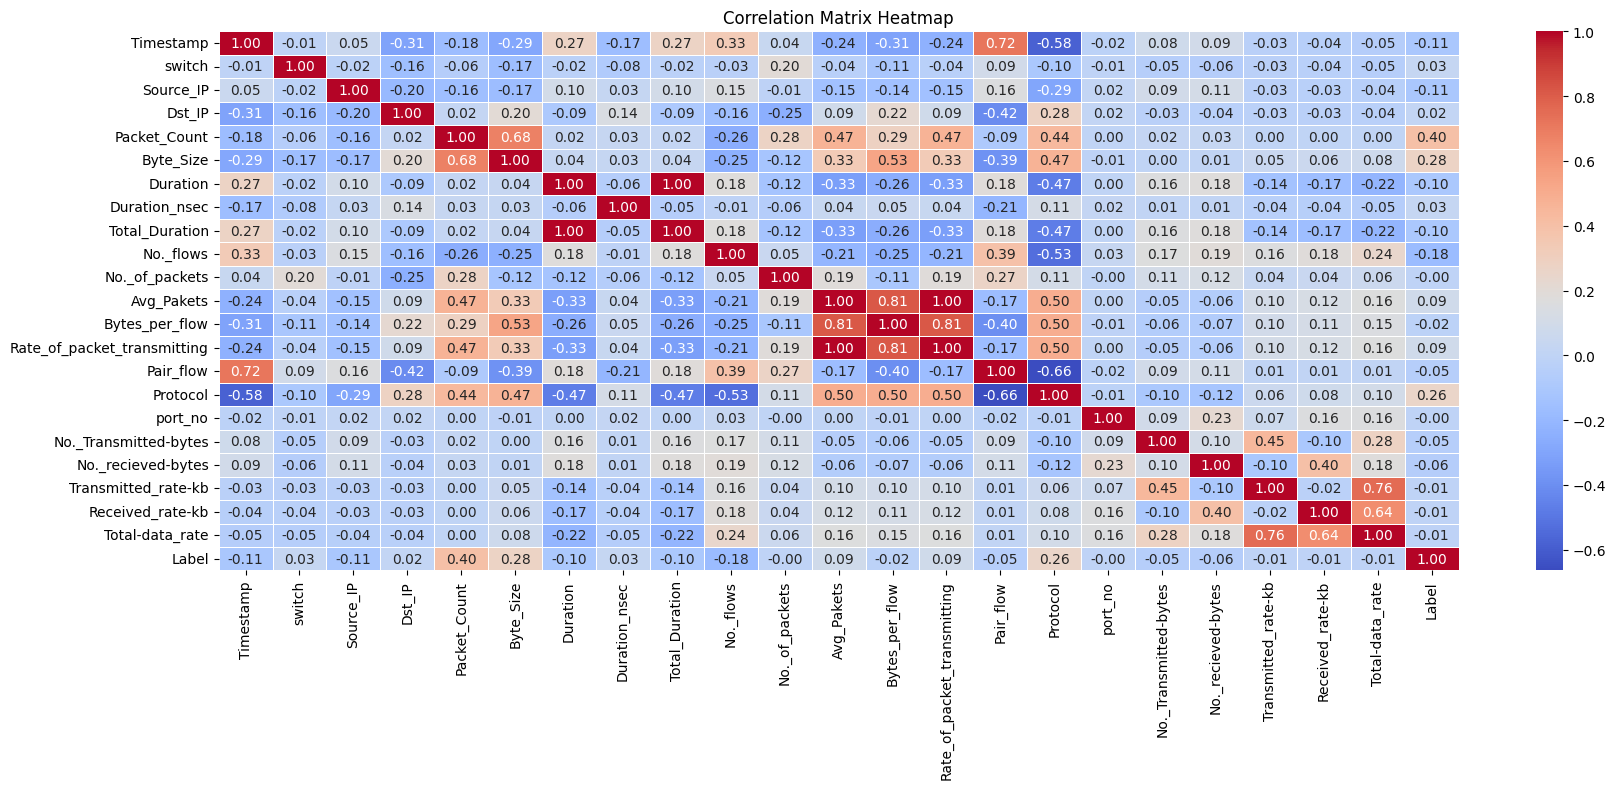

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
